<a href="https://colab.research.google.com/github/dxdyd/mynewrepository/blob/main/Copy_of_Web_Scraping_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






## **Github Link** -

## **Project Summary:**

This web scraping project is implemented in Python. It automates the collection of the job postings related to the role of "Data Scientist" from the TimesJobs website.

The script illustrates the utilization of the requests library to dispatch HTTP GET requests, BeautifulSoup for parsing the HTML content, and pandas for organizing the data in a structured manner. It navigates through various pages of search results, gathering crucial information from each job entry, which includes details such as the company name, necessary skills, experience duration, location, job description, and a direct link to the job listing.

Subsequently, the acquired data is stored in a Pandas DataFrame and exported to a CSV file for potential analysis or future reference.

## **Explanation:**

The objective of this Python web scraping project is to streamline the task of collecting job postings for the role of "Data Scientist" from the TimesJobs website. The project illustrates a systematic approach to extracting data from a web source, employing a variety of Python libraries.

1. Import Necessary Libraries:
   - The script begins by importing the required Python libraries: requests, BeautifulSoup, and pandas.

2. Set the Base URL and Search Parameters:
   - The base URL for the TimesJobs website is defined as https://www.timesjobs.com/candidate/job-search.html
   - A dictionary named "parameters" is used to store the search parameters. These parameters include search type, search keywords (e.g., "Data Scientist"), location (e.g., "India"), and the initial page number (startPage).

3. Create an Empty List for Job Data:
   - An empty list named "jobs_data" is created to store the scraped job data.

4. Scrape Data from Multiple Pages:
   - The script enters a loop to scrape data from multiple search result pages. It continues scraping until the "startPage" parameter exceeds the "sequence" parameter, which determines the number of pages to scrape.

5. Send an HTTP GET Request:
   - Inside the loop, an HTTP GET request is sent to the TimesJobs website with the specified parameters using the requests library.

6. Parse HTML Content:
   - The HTML content of the response is parsed using BeautifulSoup with the 'lxml' parser.

7. Find Job Listings:
   - Job listings are identified by finding HTML elements with the class 'clearfix job-bx wht-shd-bx.'

8. Extract Job Data:
   - For each job listing, relevant information is extracted and stored in a dictionary named "data," including the company name, required skills, years of experience, location(s), job description, and a link to the job posting.

9. Append Data to the List:
   - The "data" dictionary is appended to the "jobs_data" list for each job listing found on the page.

10. Increment the Page Parameter:
    - The "startPage" parameter is incremented to move to the next page of search results.

11. Create a Pandas DataFrame:
    - Once all the job data has been collected, a Pandas DataFrame is created from the "jobs_data" list.

12. Save Data to a CSV File:
    - The DataFrame is saved to a CSV file named "data_scientist_jobs.csv," excluding the index column.

This project demonstrates how to scrape job listings from a website, parse the HTML content, extract specific data, and store it in a structured format using Python. It showcases a practical use case of web scraping for job-related information and provides a foundation for similar data extraction tasks from other websites.

Implementin web scrapping on [Timesjobs.com](https://www.timesjobs.com/)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_jobs(url, keywords, location, sequence, output_filename):
    """
    Scrape job listings from the TimesJobs website based on specified parameters.

    Parameters:
    - url (str): The URL of the job search page.
    - keywords (str): The keywords to search for (e.g., "Data Scientist").
    - location (str): The location for the job search.
    - sequence (int): The number of pages to scrape.
    - output_filename (str): The name of the CSV file to save the scraped data.

    Returns:
    - df (DataFrame): Pandas DataFrame containing the scraped job data.
    """

    # Define search parameters for TimesJobs website
    search_params = {
        'searchType': 'personalizedSearch',
        'from': 'submit',
        'luceneResultSize': 50,  # Number of items per page
        'txtKeywords': keywords,
        'txtLocation': location,
        'sequence': sequence,
        'startPage': 1
    }

    # Initialize an empty list to store job data
    jobs_data = []

    # Loop through search result pages
    while search_params['startPage'] <= search_params['sequence']:
        # Send an HTTP GET request to the TimesJobs website with the search parameters
        response = requests.get(url, params=search_params)
        soup = BeautifulSoup(response.text, 'lxml')

        # Find job listings on the page
        jobs = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')

        # Break the loop if no job listings are found on the current page
        if not jobs:
            break

        # Loop through each job listing and extract relevant information
        for job in jobs:
            data = {
                'Company': job.find('h3', class_='joblist-comp-name').get_text(strip=True),
                'Skills': job.find('span', class_='srp-skills').get_text(strip=True),
            }

            # Extract job experience
            ul = job.find('ul', class_='top-jd-dtl clearfix').findChildren(recursive=False)
            data['Exp'] = ul[0].find(text=True, recursive=False) if ul else None

            # Extract job location(s)
            data['Location(s)'] = ul[1].span.text if ul and ul[1].span else None

            # Extract job description
            ul1 = job.find('ul', class_='list-job-dtl clearfix').findChildren(recursive=False)
            data['Desc'] = ul1[0].find('label').next_sibling.strip() if ul1 else None

            # Extract job link
            data['Link'] = job.header.h2.a['href'] if job.header.h2.a else None

            # Append the extracted job data to the list
            jobs_data.append(data)

        # Increment the startPage parameter to scrape the next page
        search_params['startPage'] += 1

    # Create a Pandas DataFrame from the scraped job data
    df = pd.DataFrame(jobs_data)

    # Save the DataFrame to a CSV file, excluding the index column
    df.to_csv(output_filename, index=False)

    return df

In [ ]:
# calling the function to scrape Data Scientist jobs and save to a CSV file
df = scrape_jobs("https://www.timesjobs.com/candidate/job-search.html", "Data Scientist", "India", 5, "data_scientist_jobs.csv")

<ipython-input-30-86a939d30680>:56: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  data['Exp'] = ul[0].find(text=True, recursive=False) if ul else None


In [ ]:
df

,Company,Skills,Exp,Location(s),Desc,Link
0,Lakeshore International(More Jobs),"Design Applications , Energy Analysis , En...",3 - 8 yrs,None,We are looking for a scientific consultant to ...,https://www.timesjobs.com/job-detail/science-a...
1,AMAZON INDIA PVT LTD,"dataengineering ,dataintegration , etl d...",5 - 9 yrs,Bengaluru / Bangalore,"Data Engineer II , Gift Cards Job ID: 2473278...",https://www.timesjobs.com/job-detail/data-engi...
2,Paytm,"machine learning ,datamining , statistic...",6 - 8 yrs,Noida/Greater Noida,"Technical Lead-Data Science Noida , Uttar Pra...",https://www.timesjobs.com/job-detail/paytm-tec...
3,Paytm,"datascience , machine learning , pytho...",6 - 8 yrs,Bengaluru / Bangalore,"Data Science - Technical Lead Bengaluru , Kar...",https://www.timesjobs.com/job-detail/paytm-dat...
4,Paytm,"datascience , machine learning , pytho...",6 - 8 yrs,Bengaluru / Bangalore,"Data Science - Technical Lead Bengaluru , Kar...",https://www.timesjobs.com/job-detail/paytm-dat...
...,...,...,...,...,...,...
245,Triveni Engineering & Industries Ltd,"sql , database , xml ,datastructures , ...",2 - 6 yrs,"Surat, Pune",Experience Required: 2-6 yearsJob Locations: S...,https://www.timesjobs.com/job-detail/data-engi...
246,Olam,"dataanalysis , report development ,datam...",3 - 6 yrs,Chennai,Data EngineerDate: 23 Nov 2023Country: IndiaFu...,https://www.timesjobs.com/job-detail/data-engi...
247,Nineleaps,"datamining , bi , sql , xml , python ...",7 - 10 yrs,Bengaluru / Bangalore,We are looking for skilled Data Analysts who c...,https://www.timesjobs.com/job-detail/data-anal...
248,Relevance Lab Inc,"fundamentals , algorithms , information te...",10 - 13 yrs,Bengaluru / Bangalore,Must have10 Years of exp in the Design and im...,https://www.timesjobs.com/job-detail/data-arch...


In [ ]:
#lets check the summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      250 non-null    object
 1   Skills       250 non-null    object
 2   Exp          250 non-null    object
 3   Location(s)  180 non-null    object
 4   Desc         250 non-null    object
 5   Link         250 non-null    object
dtypes: object(6)
memory usage: 11.8+ KB


## **Data cleanning**

**Checking Null Values if Any**

In [ ]:
df.isnull().sum()

Company         0
Skills          0
Exp             0
Location(s)    70
Desc            0
Link            0
dtype: int64

There are a few null values in the location column. Let's replace those null values with the text "Not Specified"

In [ ]:
df['Location(s)'] = df['Location(s)'].fillna('Not specified')

# Now, check again for null values
print(df.isnull().sum())

Company        0
Skills         0
Exp            0
Location(s)    0
Desc           0
Link           0
dtype: int64


## **Cleaning and formatting the 'Exp' column to extract numeric experience values.**

In [ ]:
# Clean and format the 'Exp' column
df['Exp'] = df['Exp'].str.replace(' yrs', '').str.replace(' Yrs', '').str.replace('yr', '').str.replace('Yr', '').str.strip()
df['Exp'] = df['Exp'].str.extract(r'(\d+)').astype(float)

##**Cleaning and formatting the 'Location(s)' column to remove extra spaces.**

In [ ]:
# Clean and format the 'Location(s)' column to remove extra spaces
df['Location(s)'] = df['Location(s)'].str.replace('\s+', ' ', regex=True).str.strip()

##**Cleaning and formatting the 'Skills' column by stripping extra whitespace.**

In [ ]:
# Clean and format the 'Skills' column by stripping extra whitespace
df['Skills'] = df['Skills'].str.strip()

In [ ]:
df.head(n = 10)

,Company,Skills,Exp,Location(s),Desc,Link
0,Lakeshore International(More Jobs),"Design Applications , Energy Analysis , En...",3.0,Not specified,We are looking for a scientific consultant to ...,https://www.timesjobs.com/job-detail/science-a...
1,AMAZON INDIA PVT LTD,"dataengineering ,dataintegration , etl d...",5.0,Bengaluru / Bangalore,"Data Engineer II , Gift Cards Job ID: 2473278...",https://www.timesjobs.com/job-detail/data-engi...
2,Paytm,"machine learning ,datamining , statistic...",6.0,Noida/Greater Noida,"Technical Lead-Data Science Noida , Uttar Pra...",https://www.timesjobs.com/job-detail/paytm-tec...
3,Paytm,"datascience , machine learning , pytho...",6.0,Bengaluru / Bangalore,"Data Science - Technical Lead Bengaluru , Kar...",https://www.timesjobs.com/job-detail/paytm-dat...
4,Paytm,"datascience , machine learning , pytho...",6.0,Bengaluru / Bangalore,"Data Science - Technical Lead Bengaluru , Kar...",https://www.timesjobs.com/job-detail/paytm-dat...
5,infinity business solutions pvt ltd,"BigData, Analytics , Hadoop , Spark ...",12.0,Gurgaon,Posted on:6-Dec-2016Head Data Innovation & ...,https://www.timesjobs.com/job-detail/head-data...
6,infinity business solutions pvt ltd,"Java , Python , Scala , BigData, So...",2.0,Bengaluru / Bangalore,Posted on:18-Mar-2018Big Data Developer with J...,https://www.timesjobs.com/job-detail/big-data-...
7,buck global llc,"dataanalysis , predictive modeling , s...",2.0,Bengaluru / Bangalore,"Description:Target is an iconic brand , a For...",https://www.timesjobs.com/job-detail/de-jobs-t...
8,Vishal(More Jobs),Work from home or anywhere giving ultimate fle...,0.0,Not specified,You can earn unlimited money sitting anywhere ...,https://www.timesjobs.com/job-detail/data-admi...
9,Vishal(More Jobs),Golden chance for fresher work from mobile and...,0.0,Not specified,We r looking for friendly candidates for onlin...,https://www.timesjobs.com/job-detail/data-admi...


The data is now clean. Let's do some visualizations.

## **Data Visualization**

**Count of Job Listings by Company**


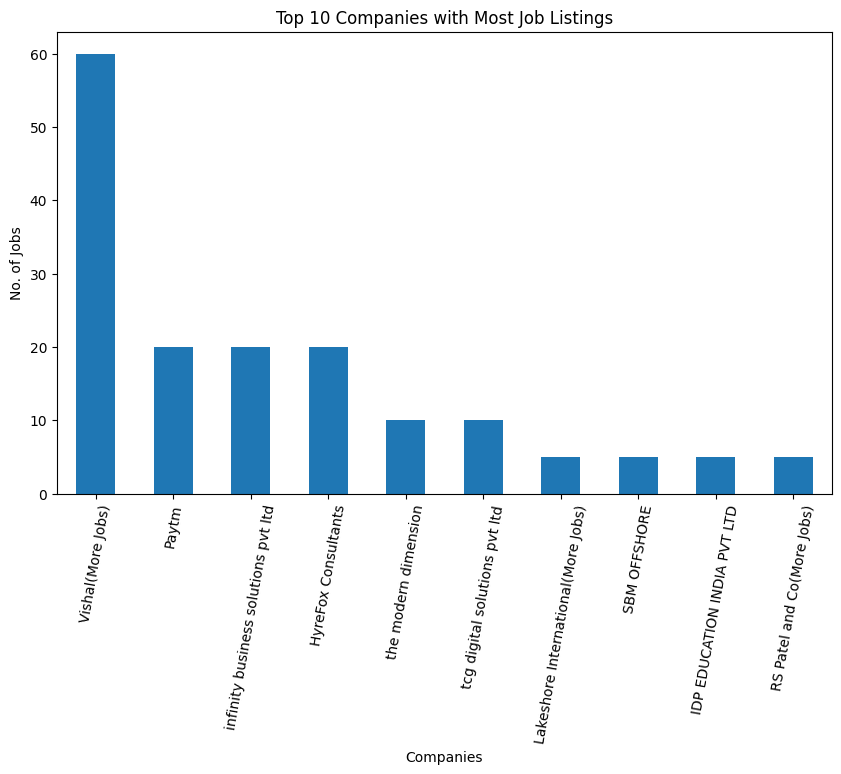

In [ ]:
import matplotlib.pyplot as plt

# Count job listings by company
company_counts = df['Company'].value_counts()

# Plot the top 10 companies with the most job listings
top_10_companies = company_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_companies.plot(kind='bar')
plt.title('Top 10 Companies with Most Job Listings')
plt.xlabel('Companies')
plt.ylabel('No. of Jobs')
plt.xticks(rotation=80)
plt.show()

 **Job Experience Distribution**

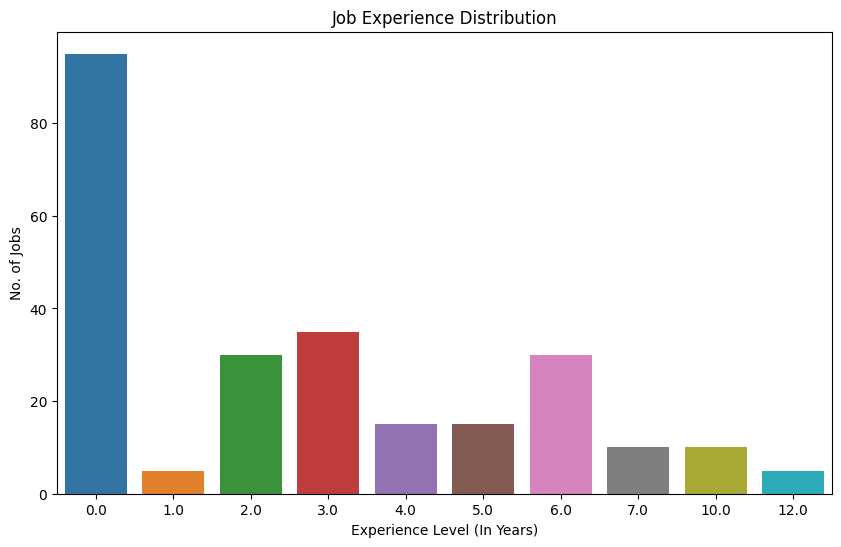

In [ ]:
import seaborn as sns

# Plot the distribution of job experience levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Exp')
plt.title('Job Experience Distribution')
plt.xlabel('Experience Level (In Years)')
plt.ylabel('No. of Jobs')
plt.show()

**Skills Required**

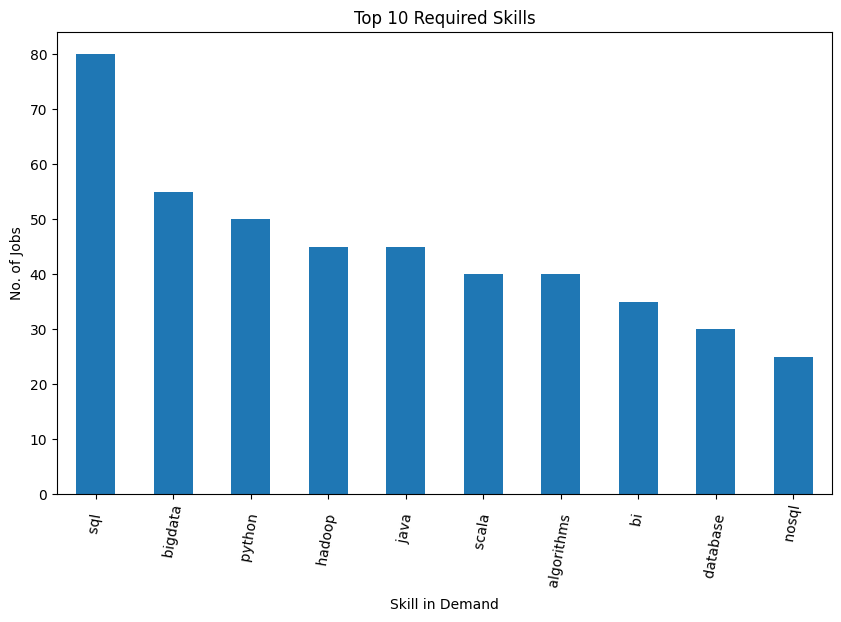

In [ ]:
# Plot the most common skills required
skills_counts = df['Skills'].str.split(', ').explode().value_counts()

# Plot the top 10 skills
top_10_skills = skills_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_skills.plot(kind='bar')
plt.title('Top 10 Required Skills')
plt.xlabel('Skill in Demand')
plt.ylabel('No. of Jobs')
plt.xticks(rotation=80)
plt.show()

**Bar Plot of Top 10 Locations with Most Job Listings**

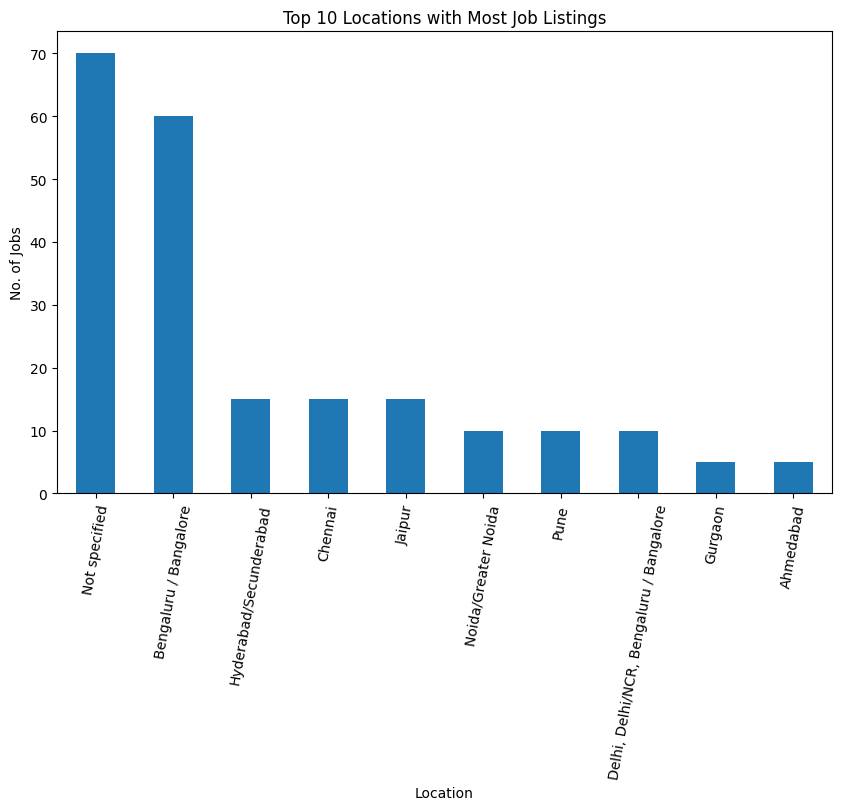

In [ ]:
import matplotlib.pyplot as plt

# Count job listings by location
location_counts = df['Location(s)'].value_counts()

# Plot the top 10 locations with the most job listings
top_10_locations = location_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar')
plt.title('Top 10 Locations with Most Job Listings')
plt.xlabel('Location')
plt.ylabel('No. of Jobs')
plt.xticks(rotation=80)
plt.show()

**Word Cloud of Job Descriptions**

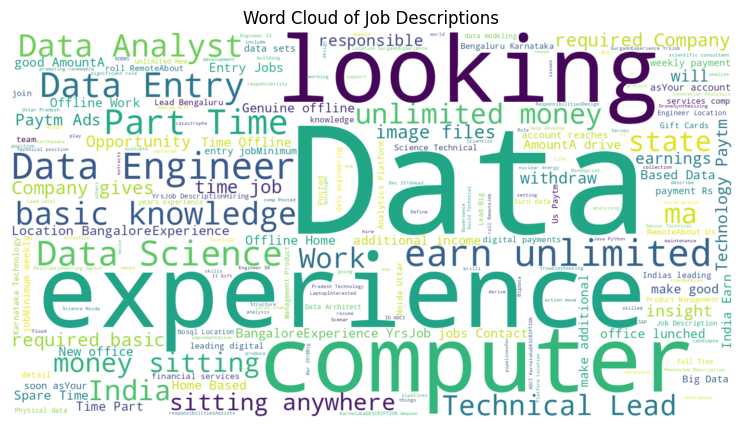

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all job descriptions into a single string
job_descriptions = " ".join(df['Desc'])

# Create a word cloud
wordcloud = WordCloud(width=1500, height=800, background_color='white').generate(job_descriptions)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Job Descriptions')
plt.show()

##**Conclusion:**

This web scraping project provides a practical example of how to collect job-related information from the TimesJobs website using Python. It demonstrates the use of popular libraries like requests, BeautifulSoup, and pandas to automate the data extraction process. The script can be modified to scrape job listings for different positions, locations, or additional details, making it a versatile tool for gathering data from online job portals. The extracted data is organized in a structured format, making it easy for further analysis or reference.